### Question 1:-How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain

Answer:-
Number of multiplivations for one character in final matrix = k
final size of matrix = nxm
therefore total number of multiplications= kxmxn

### Question 2:-Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [24]:
import time
def matrix_multiplication(A, B):
    n = len(A)        
    k = len(A[0])     
    m = len(B[0])     
    result = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += A[i][l] * B[l][j]
    return result
A = [[10, 22, 13], [64, 55, 69]]  
B = [[17, 53], [99, 10], [23, 14]]
result = matrix_multiplication(A, B)
print("Result using list of lists:")
for row in result:
    print(row)
start_time = time.perf_counter()
result = matrix_multiplication(A, B)
end_time = time.perf_counter()
time_taken = end_time - start_time
print(f"\nTime taken with list of lists: {time_taken:.6f} seconds")


start_time_numpy = time.perf_counter()
A_np = np.array([[10, 22, 13], [64, 55, 69]]) # 2x3 matrix
B_np = np.array([[17, 53], [99, 10], [23, 14]])  # 3x2 matrix
result_numpy = np.dot(A_np, B_np)
print("Result using NumPy:")
print(result_numpy)
end_time_numpy = time.perf_counter()
time_taken_numpy = end_time_numpy - start_time_numpy
print(f"Time taken with NumPy: {time_taken_numpy:.6f} seconds")

if time_taken_numpy < time_taken:
    print(f"NumPy is approximately {time_taken / time_taken_numpy:.2f} times faster.")
else:
    print(f"lists is approximately {time_taken_numpy / time_taken:.2f} times faster.")

Result using list of lists:
[2647, 932]
[8120, 4908]

Time taken with list of lists: 0.000072 seconds
Result using NumPy:
[[2647  932]
 [8120 4908]]
Time taken with NumPy: 0.005864 seconds
lists is approximately 81.35 times faster.


When your matrices are big, NumPy leaves plain Python lists in the dust — it uses super-fast C and Fortran code under the hood to do the math.

But if your matrices are tiny, or if you’re timing the whole process including converting your lists into NumPy arrays first, regular Python lists can look faster. In those cases, the “getting ready” overhead in NumPy can take longer than the math itself.

### Question 3:- Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [31]:
import time
import numpy as np
import random

def get_array_size():
    while True:
        try:
            size = int(input("Please enter the number of elements for the array: "))
            if size > 0:
                return size
            else:
                print("The size must be a positive integer. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a whole number.")

def generate_random_numbers(size):
    numbers = []
    for _ in range(size):
        numbers.append(random.randint(0, 10000))
    return numbers

def slow_median_finder(data):
    length = len(data)
    if length == 0:
        raise ValueError("The array is empty.")

    temp_data = list(data)
    
    for _ in range(length // 2 + 1):
        largest_value = -float('inf')
        largest_index = -1
        
        for index in range(len(temp_data)):
            if temp_data[index] > largest_value:
                largest_value = temp_data[index]
                largest_index = index
        
        temp_data.pop(largest_index)
        
    selected_elements = sorted(data, reverse=True)[:length // 2 + 1]

    if length % 2 == 1:
        return float(selected_elements[-1])
    else:
        return (float(selected_elements[-1]) + float(selected_elements[-2])) / 2.0

def fast_median_finder(data):
    length = len(data)
    if length == 0:
        raise ValueError("The array is empty.")
    
    data.sort() 
    
    if length % 2 == 1:
        return float(data[length // 2])
    else:
        mid_value1 = data[length // 2 - 1]
        mid_value2 = data[length // 2]
        return (float(mid_value1) + float(mid_value2)) / 2.0

array_length = get_array_size()
random_array = generate_random_numbers(array_length)

start_time_slow = time.perf_counter()
median_slow = slow_median_finder(random_array.copy())
end_time_slow = time.perf_counter()
elapsed_time_slow = end_time_slow - start_time_slow

start_time_fast = time.perf_counter()
median_fast = fast_median_finder(random_array.copy())
end_time_fast = time.perf_counter()
elapsed_time_fast = end_time_fast - start_time_fast

start_time_numpy = time.perf_counter()
median_numpy = np.median(random_array)
end_time_numpy = time.perf_counter()
elapsed_time_numpy = end_time_numpy - start_time_numpy

print(f"\nMedian (Slow Method): {median_slow:.2f}")
print(f"Time (Slow Method): {elapsed_time_slow:.6f} seconds")

print(f"\nMedian (Fast Method): {median_fast:.2f}")
print(f"Time (Fast Method): {elapsed_time_fast:.6f} seconds")

print(f"\nMedian (NumPy Method): {median_numpy:.2f}")
print(f"Time (NumPy Method): {elapsed_time_numpy:.6f} seconds")


Please enter the number of elements for the array:  1000



Median (Slow Method): 4886.00
Time (Slow Method): 0.011298 seconds

Median (Fast Method): 4886.00
Time (Fast Method): 0.000147 seconds

Median (NumPy Method): 4886.00
Time (NumPy Method): 0.000227 seconds


In [32]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

gradient = (df_dx, df_dy)

print("f(x, y) =", f)
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)
print("Gradient =", gradient)

f(x, y) = x**2*y + y**3*sin(x)
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)
Gradient = (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


### Question 4:- What is the gradient of the following function with respect to x and y?
###                    x²y + y³sin(x)

#### Gradient with respect to x and y


we have  f(x, y) =  x²y + y³sin(x)

#### Partial derivative w.r.t x

∂f/∂x = 2xy + y³cos(x)

#### partial derivative w.r.t y

∂f/∂y = x² + 3y²sin(x)

#### The Final gradient

∇f = (∂f/∂x, ∂f/∂y) = (2xy + y³cos(x),   x² + 3y²sin(x)    )


### Question 5:- Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [37]:
import jax.numpy as jnp
from jax import grad

def calculate_function(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gradient_function = grad(calculate_function, argnums=(0, 1))

def test_with_sample_values():
    x_values = [2.5, 0.4, 3.1]
    y_values = [1.7, 2.2, 0.9]
    
    for x, y in zip(x_values, y_values):
        analytical_dx = 2 * x * y + y**3 * jnp.cos(x)
        analytical_dy = x**2 + 3 * y**2 * jnp.sin(x)
        
        computed_dx, computed_dy = gradient_function(x, y)
        
        print(f"For x = {x:.2f}, y = {y:.2f}:")
        print(f"  Analytical Gradient: ({analytical_dx:.4f}, {analytical_dy:.4f})")
        print(f"  Computed Gradient: ({computed_dx:.4f}, {computed_dy:.4f})")
        print(f"  Are they close? {jnp.allclose(jnp.array([analytical_dx, analytical_dy]), jnp.array([computed_dx, computed_dy]))}")
        print()

test_with_sample_values()


For x = 2.50, y = 1.70:
  Analytical Gradient: (4.5640, 11.4388)
  Computed Gradient: (4.5640, 11.4388)
  Are they close? True

For x = 0.40, y = 2.20:
  Analytical Gradient: (11.5675, 5.8144)
  Computed Gradient: (11.5675, 5.8144)
  Are they close? True

For x = 3.10, y = 0.90:
  Analytical Gradient: (4.8516, 9.7110)
  Computed Gradient: (4.8516, 9.7110)
  Are they close? True



### Question 6:- Use sympy to confirm that you obtain the same gradient analytically.

In [49]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute gradients
gradient_x = sp.diff(f, x)
gradient_y = sp.diff(f, y)

# Test with some values
def test_with_sample_values():
    x_values = [2.5, 0.4, 3.1]
    y_values = [1.7, 2.2, 0.9]
    for xv, yv in zip(x_values, y_values):
        gx = gradient_x.evalf(subs={x: xv, y: yv})
        gy = gradient_y.evalf(subs={x: xv, y: yv})
        print(f"x = {xv}, y = {yv}")
        print(f"Gradient w.r.t x: {gx:.4f}")
        print(f"Gradient w.r.t y: {gy:.4f}")
        print()

test_with_sample_values()

x = 2.5, y = 1.7
Gradient w.r.t x: 4.5640
Gradient w.r.t y: 11.4388

x = 0.4, y = 2.2
Gradient w.r.t x: 11.5675
Gradient w.r.t y: 5.8144

x = 3.1, y = 0.9
Gradient w.r.t x: 4.8516
Gradient w.r.t y: 9.7110



### Question &:- Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022

Branch 1

Roll Number: 1, Name: N, Marks:

Maths: 100, English: 70 …

Branch 2

2023

Branch 1

Branch 2

2024

Branch 1


Branch 2

2025

Branch 1

Branch 2

In [52]:
student_records = {
    2022: {
        "CSE": {
            1: {
                "Name": "Sanjay",
                "Marks": {
                    "Maths": 92,"English": 85,"Science": 88
                }
            },
            2: {
                "Name": "Mohan",
                "Marks": {
                    "Maths": 78,"English": 82,"Science": 75
                }
            }
        },
        "ECE": {
            1: {
                "Name": "Rakesh",
                "Marks": {
                    "Maths": 85,"English": 76,"Science": 81
                }
            },
            2: {
                "Name": "Rachin",
                "Marks": {
                    "Maths": 90,"English": 88,"Science": 92
                }
            }
        }
    },
    2023: {
        "CSE": {
            1: {
                "Name": "Vibhav",
                "Marks": {
                    "Maths": 87,"English": 79,"Science": 84
                }
            },
            2: {
                "Name": "Vishal",
                "Marks": {
                    "Maths": 82,"English": 91,"Science": 86
                }
            }
        },
        "ECE": {
            1: {
                "Name": "Akriti",
                "Marks": {
                    "Maths": 95,"English": 89,"Science": 92
                }
            },
            2: {
                "Name": "Aradhya",
                "Marks": {
                    "Maths": 76,"English": 84,"Science": 79
                }
            }
        }
    },
    2024: {
        "CSE": {
            1: {
                "Name": "Karthik",
                "Marks": {
                    "Maths": 88,"English": 82,"Science": 90
                }
            },
            2: {
                "Name": "Sachin",
                "Marks": {
                    "Maths": 81,"English": 77,"Science": 84
                }
            }
        },
        "ECE": {
            1: {
                "Name": "Mithali",
                "Marks": {
                    "Maths": 93,"English": 87,"Science": 89
                }
            },
            2: {
                "Name": "Suresh",
                "Marks": {
                    "Maths": 84,"English": 91,"Science": 82
                }
            }
        }
    },
    2025: {
        "CSE": {
            1: {
                "Name": "Neha",
                "Marks": {
                    "Maths": 89,"English": 83,"Science": 87
                }
            },
            2: {
                "Name": "Rahul",
                "Marks": {
                    "Maths": 77,"English": 85,"Science": 80
                }
            }
        },
        "ECE": {
            1: {
                "Name": "Priya",
                "Marks": {"Maths": 91,"English": 86,"Science": 88
                }
            },
            2: {
                "Name": "Ajay",
                "Marks": {"Maths": 79,"English": 82,"Science": 84
                }
            }
        }
    }
}

print("2022 CSE Student 1:", student_records[2022]["CSE"][1])

print("Mohan's English marks:", student_records[2022]["CSE"][2]["Marks"]["English"])

print("2023 CSE Students:", student_records[2023]["CSE"])

print("Priya's science marks:", student_records[2025]["ECE"][1]["Marks"]["Science"])

print("2024 ECE Student 2 name:", student_records[2024]["ECE"][2]["Name"])

2022 CSE Student 1: {'Name': 'Sanjay', 'Marks': {'Maths': 92, 'English': 85, 'Science': 88}}
Mohan's English marks: 82
2023 CSE Students: {1: {'Name': 'Vibhav', 'Marks': {'Maths': 87, 'English': 79, 'Science': 84}}, 2: {'Name': 'Vishal', 'Marks': {'Maths': 82, 'English': 91, 'Science': 86}}}
Priya's science marks: 88
2024 ECE Student 2 name: Suresh


### Question 8:- Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [55]:
class StudentRecord:
    
    def __init__(self, id, name, grades):
        self.id = id  # Student roll number
        self.name = name
        self.grades = grades  # Dictionary of subjects: scores
    
    def show_info(self):
        print(f"Student {self.id}: {self.name}")
        for subject, score in self.grades.items():
            print(f"  - {subject}: {score}/100")

class Department:

    
    def __init__(self, name):
        self.name = name
        self.students = []  # List of StudentRecord objects
    
    def enroll(self, student):
        self.students.append(student)
    
    def list_students(self):
        print(f"\nStudents in {self.name}:")
        for student in self.students:
            student.show_info()

class AcademicYear:

    
    def __init__(self, year):
        self.year = year
        self.departments = []  # List of Department objects
    
    def add_department(self, dept):
        self.departments.append(dept)
    
    def show_year_summary(self):
        print(f"\n{self.year} Academic Year")
        for dept in self.departments:
            print(f"- {dept.name} has {len(dept.students)} students")

# Let's build our university records
university = []

# Set up 2022 records
current_year = AcademicYear(2022)

# Create Computer Science department
cs_dept = Department("Computer Science")
cs_dept.enroll(StudentRecord(1, "Sanjay", {"Math": 92, "English": 85}))
cs_dept.enroll(StudentRecord(2, "Mohan", {"Math": 78, "English": 82}))

# Create Electronics department
ece_dept = Department("Electronics") 
ece_dept.enroll(StudentRecord(1, "Rakesh", {"Math": 85, "English": 76}))
ece_dept.enroll(StudentRecord(2, "Rachin", {"Math": 90, "English": 88}))

current_year.add_department(cs_dept)
current_year.add_department(ece_dept)
university.append(current_year)

# See it in action
print("University Record System")
university[0].show_year_summary()
university[0].departments[0].list_students()

# Example: Check someone's grade
mohans_math = university[0].departments[0].students[1].grades["Math"]
print(f"\nMohan scored {mohans_math} in Math")

University Record System

2022 Academic Year
- Computer Science has 2 students
- Electronics has 2 students

Students in Computer Science:
Student 1: Sanjay
  - Math: 92/100
  - English: 85/100
Student 2: Mohan
  - Math: 78/100
  - English: 82/100

Mohan scored 78 in Math


### Question 9:- Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

y = x

y = x^2

y = (x^3) / 100

y = sin(x)

y = sin(x) / x

y = log(x)

y = e^x

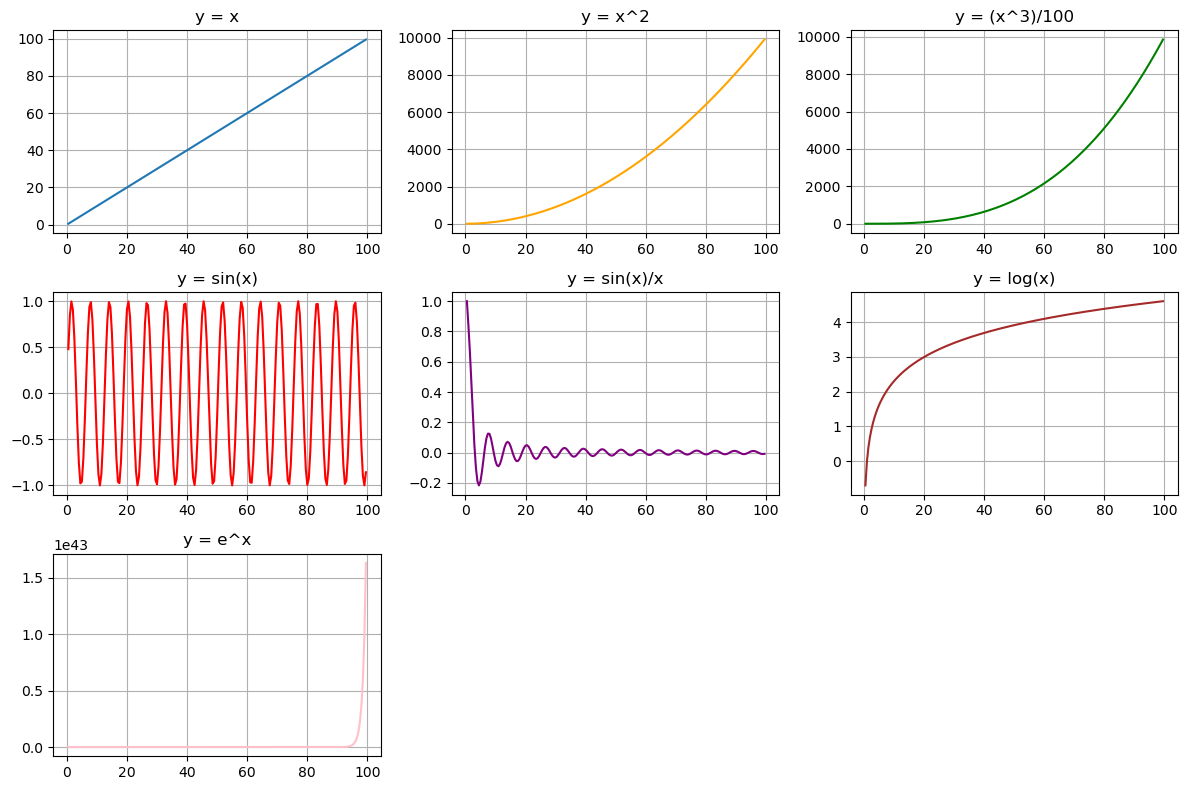

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100.0, 0.5)

# Functions
y1 = x                      # y = x
y2 = x**2                   # y = x^2
y3 = (x**3) / 100          # y = (x^3) / 100
y4 = np.sin(x)             # y = sin(x)
y5 = np.sin(x) / x         # y = sin(x) / x (with x != 0)
y5[0] = 1                   # Correct value for y5 when x = 0.5
y6 = np.log(x)             # y = log(x)
y7 = np.exp(x)             # y = e^x

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='y = x')
plt.title('y = x')
plt.grid()

plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y = x^2', color='orange')
plt.title('y = x^2')
plt.grid()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y = (x^3)/100', color='green')
plt.title('y = (x^3)/100')
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y = sin(x)', color='red')
plt.title('y = sin(x)')
plt.grid()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y = sin(x)/x', color='purple')
plt.title('y = sin(x)/x')
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y = log(x)', color='brown')
plt.title('y = log(x)')
plt.grid()

plt.subplot(3, 3, 7)
plt.plot(x, y7, label='y = e^x', color='pink')
plt.title('y = e^x')
plt.grid()

plt.tight_layout()
plt.show()

### Question 10:- Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [59]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])


standard_deviations = df.std()
high_std_column = standard_deviations.idxmax()

row_means = df.mean(axis=1)
low_mean_row = row_means.idxmin()

print(f"\nRandom DataFrame (first 5 rows):")
print(df.head())

print("\nAnalysis Results:")
print(f"- Column with highest standard deviation: '{high_std_column}' (std = {standard_deviations[high_std_column]:.4f})")
print(f"- Row with lowest mean: Row {low_mean_row} (mean = {row_means[low_mean_row]:.4f})")

print("\nAll column standard deviations:")
print(standard_deviations.round(4))
print("\nAll row means:")
print(row_means.round(4))



Random DataFrame (first 5 rows):
          a         b         c         d         e
0  1.396093  1.052653  1.699632  1.139871  1.470056
1  1.467705  1.588781  1.240966  1.345038  1.666874
2  1.557622  1.016007  1.175307  1.110253  1.293862
3  1.520111  1.649482  1.945808  1.297894  1.994440
4  1.134961  1.899258  1.772645  1.307099  1.288946

Analysis Results:
- Column with highest standard deviation: 'b' (std = 0.3067)
- Row with lowest mean: Row 2 (mean = 1.2306)

All column standard deviations:
a    0.1898
b    0.3067
c    0.2821
d    0.2613
e    0.3025
dtype: float64

All row means:
0     1.3517
1     1.4619
2     1.2306
3     1.6815
4     1.4806
5     1.5234
6     1.5792
7     1.6249
8     1.4395
9     1.3617
10    1.5123
11    1.6190
12    1.4211
13    1.7207
14    1.4271
15    1.4803
16    1.5707
17    1.7122
18    1.6032
19    1.5313
dtype: float64


### Question 11:- Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [60]:
import numpy as np
import pandas as pd

data = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df.sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = df[df['g'] == 'LT8'].shape[0]
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("DataFrame with added columns:")
print(df.head())

print("\nAnalysis Results:")
print(f"Number of rows with g='LT8': {lt8_count}")
print(f"Standard deviation of 'f' when g='LT8': {std_lt8:.4f}")
print(f"Standard deviation of 'f' when g='GT8': {std_gt8:.4f}")


DataFrame with added columns:
          a         b         c         d         e         f    g
0  1.195207  1.779239  1.717553  1.273065  1.011230  6.976294  LT8
1  1.870949  1.244405  1.981671  1.284433  1.652228  8.033686  GT8
2  1.922841  1.336311  1.536464  1.659539  1.723609  8.178765  GT8
3  1.751512  1.188625  1.332775  1.766066  1.422346  7.461323  LT8
4  1.064796  1.388557  1.939994  1.397376  1.460957  7.251679  LT8

Analysis Results:
Number of rows with g='LT8': 17
Standard deviation of 'f' when g='LT8': 0.4640
Standard deviation of 'f' when g='GT8': 0.1556


### Question 12:- Write a small piece of code to explain broadcasting in numpy.

In [61]:
import numpy as np

vector = np.array([1, 2, 3])

matrix = np.array([[10, 20, 30],

                   [40, 50, 60],

                   [70, 80, 90]])

result = matrix + vector

print("Matrix:")

print(matrix)

print("\nVector:")

print(vector)

print("\nResult of Broadcasting (Matrix + Vector):")

print(result)

Matrix:
[[10 20 30]
 [40 50 60]
 [70 80 90]]

Vector:
[1 2 3]

Result of Broadcasting (Matrix + Vector):
[[11 22 33]
 [41 52 63]
 [71 82 93]]


### Question 13:- Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [66]:
import numpy as np

def find_min_index(arr):
    min_pos = 0
    for i in range(1, len(arr)):
        if arr[i] < arr[min_pos]:
            min_pos = i
    return min_pos

# Let's test it out
numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3])
our_result = find_min_index(numbers)
numpy_result = np.argmin(numbers)

print(f"The smallest is at position: {our_result}")
print(f"NumPy agrees it's at position: {numpy_result}")
print(f"The actual minimum value is: {numbers[our_result]}")

The smallest is at position: 1
NumPy agrees it's at position: 1
The actual minimum value is: 1
